In [1]:
#Import necessary packages for analysis and viz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import matplotlib.image as mpimg
import folium
import plotly.graph_objects as go
import plotly.express as px

from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from geopy.geocoders import Nominatim

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import pickle
from joblib import dump, load

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import requests
import io
import os
import datetime

In [2]:
vehicle_data_path = r'C:\Users\tuf04\Python Code\Springboard Data Science Career Track\Predicting-Used-Car-Prices-CapstoneProject\new data\processed_vehicle_data.csv'
df = pd.read_csv(vehicle_data_path)
df.head()

id             region  price manufacturer                  model  \
0  7184712241  duluth / superior  16995          gmc  sierra classic 2500hd   
1  7184711787  duluth / superior  13995         ford                  f-150   
2  7184710887  duluth / superior   7995    chevrolet                equinox   
3  7184710023  duluth / superior   8995    chevrolet               traverse   
4  7184709156  duluth / superior  10995         ford               explorer   

  condition  cylinders    fuel  odometer title_status transmission drive  \
0      good        8.0  diesel  254217.0        clean    automatic   4wd   
1      good        6.0     gas  188406.0        clean    automatic   4wd   
2      good        4.0     gas  108124.0        clean    automatic   4wd   
3      good        6.0     gas  178054.0        clean    automatic   4wd   
4      good        6.0     gas  170259.0        clean    automatic   4wd   

    type paint_color state      lat     long    year  age  
0  truck       white    mn  45.6836 -92.9648  2007.0   13  
1  truck        grey    mn  45.6836 -92.9648  2012.0    8  
2    SUV        grey    mn  45.6836 -92.9648  2010.0   10  
3    SUV       white    mn  45.6836 -92.9648  2011.0    9  
4    SUV       white    mn  45.6836 -92.9648  2014.0    6

In [3]:
#evaluate vehicle metrics by manufacturer/model
df_ford = df[df['manufacturer'] == 'ford'] 
df_chev = df[df['manufacturer'] == 'chevrolet']
df_toyata = df[df['manufacturer'] == 'toyata'] 
df_honda = df[df['manufacturer'] == 'honda']
df_nissan = df[df['manufacturer'] == 'nissan'] 
df_jeep = df[df['manufacturer'] == 'jeep']
df_dodge = df[df['manufacturer'] == 'dodge'] 
df_gmc = df[df['manufacturer'] == 'gmc']
df_hyundai = df[df['manufacturer'] == 'hyundai'] 
df_ram = df[df['manufacturer'] == 'ram']

<ipython-input-4-533f76ceb642>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


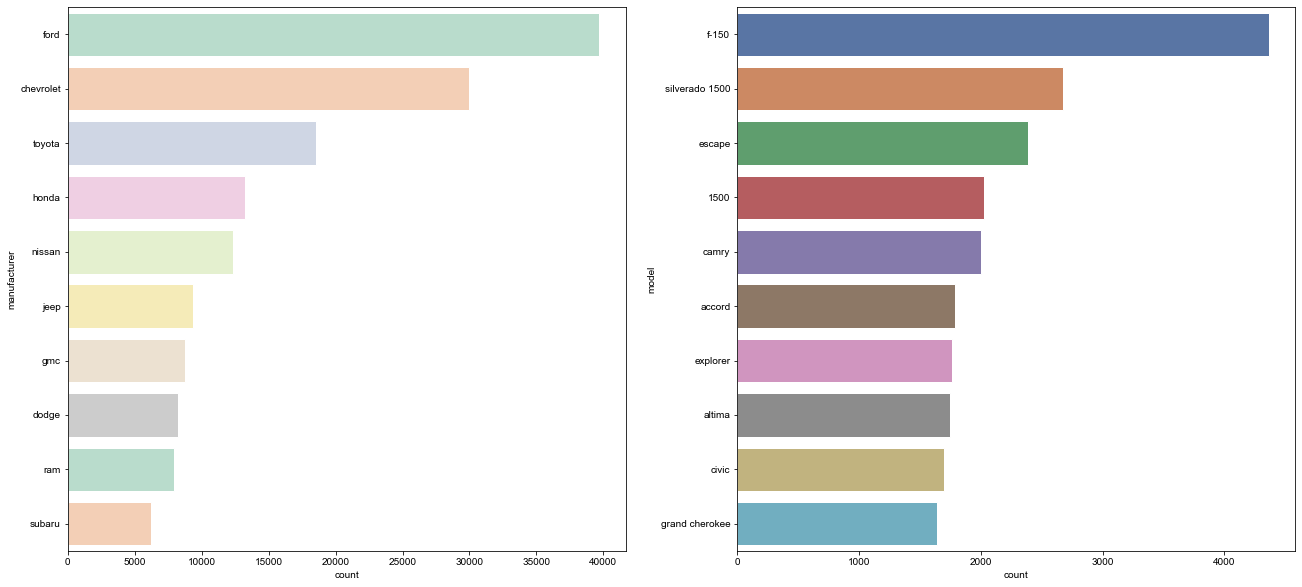

In [4]:
fig, ax =plt.subplots(1,2,figsize=(22, 10))
sns.set(rc={"axes.facecolor":"#fcfcfc", "axes.grid":False,'xtick.labelsize':20,'ytick.labelsize':20})
sns.countplot(y ='model',data = df,order=df.model.value_counts().iloc[:10].index, ax = ax[1]) 
sns.countplot(y ='manufacturer',data = df,order=df.manufacturer.value_counts().iloc[:10].index, ax= ax[0],palette = "Pastel2")
fig.show()

<ipython-input-5-d9bcd97578f8>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


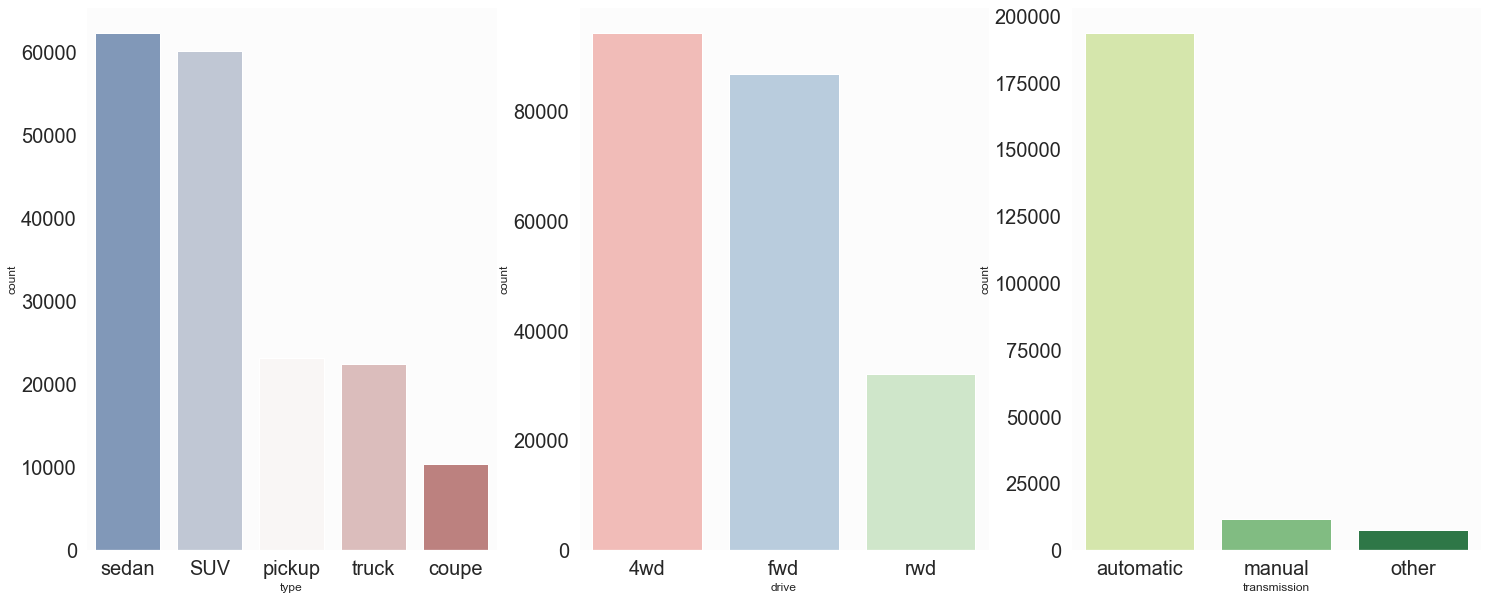

In [5]:
fig, ax =plt.subplots(1,3,figsize=(25, 10))
sns.set(rc={"axes.facecolor":"#fcfcfc", "axes.grid":False,'xtick.labelsize':15,'ytick.labelsize':15})
sns.countplot(x ='type',data = df,order=df.type.value_counts().iloc[:5].index, ax = ax[0],palette="vlag")
sns.countplot(x ='drive',data = df,order=df.drive.value_counts().iloc[:5].index, ax = ax[1],palette="Pastel1")
sns.countplot(x ='transmission',data = df,order=df.transmission.value_counts().iloc[:5].index, ax = ax[2],palette="YlGn")
fig.show()

In [6]:
model = df_ford['model'].value_counts()
model_f = model.iloc[0:10]
df1=model_f.to_frame()
df1["Manufacturer"] = "ford"

model = df_chev['model'].value_counts()
model_c = model.iloc[0:10]
df2=model_c.to_frame()
df2["Manufacturer"] = "chevrolet"

model = df_toyata['model'].value_counts()
model_toyata = model.iloc[0:10]
df3=model_toyata.to_frame()
df3["Manufacturer"] = "toyata"

model = df_honda['model'].value_counts()
model_honda = model.iloc[0:10]
df4=model_honda.to_frame()
df4["Manufacturer"] = "honda"

model = df_nissan['model'].value_counts()
model_nissan = model.iloc[0:10]
df5=model_nissan.to_frame()
df5["Manufacturer"] = "nissan"

model = df_jeep['model'].value_counts()
model_jeep = model.iloc[0:10]
df6=model_jeep.to_frame()
df6["Manufacturer"] = "jeep"

model = df_dodge['model'].value_counts()
model_dodge = model.iloc[0:10]
df7=model_dodge.to_frame()
df7["Manufacturer"] = "dodge"

model = df_gmc['model'].value_counts()
model_gmc = model.iloc[0:10]
df8=model_gmc.to_frame()
df8["Manufacturer"] = "gmc"

model = df_hyundai['model'].value_counts()
model_hyundai = model.iloc[0:10]
df9=model_hyundai.to_frame()
df9["Manufacturer"] = "hyundai"

model = df_ram['model'].value_counts()
model_ram = model.iloc[0:10]
df0=model_ram.to_frame()
df0["Manufacturer"] = "ram"

frames = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df0]
result = pd.concat(frames)

result=result.reset_index()
result

index  model Manufacturer
0                    f-150   4365         ford
1                   escape   2389         ford
2                 explorer   1760         ford
3                   fusion   1410         ford
4                    focus   1268         ford
..                     ...    ...          ...
85                    5500    111          ram
86            1500 classic     93          ram
87  1500 sport 4x4 1/2 ton     91          ram
88           2500 crew cab     89          ram
89            1500 laramie     83          ram

[90 rows x 3 columns]

In [7]:
fig =px.sunburst(
    result,path=['Manufacturer','index'],values='model', color='Manufacturer'
                  )
fig.update_layout(margin=dict(t=1, b=1, r=1, l=1))
fig.show()

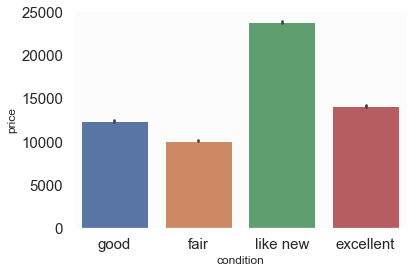

In [8]:
ax = sns.barplot(x="condition", y="price", data=df)

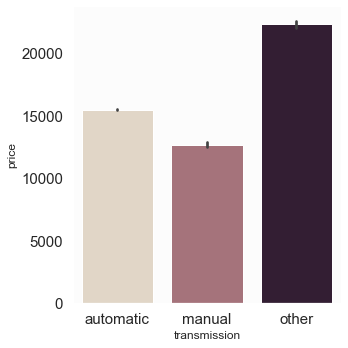

In [9]:
sns.catplot(x="transmission", y="price",kind="bar", palette="ch:.25", data=df)

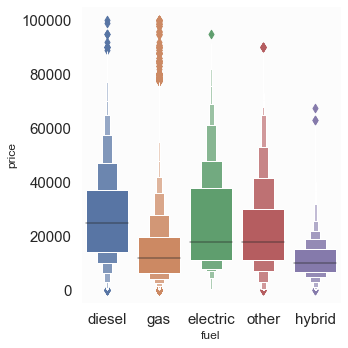

In [10]:
sns.catplot(x="fuel", y="price", kind="boxen",
            data=df)

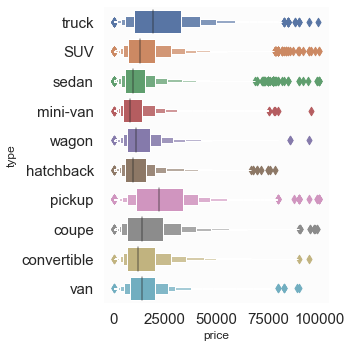

In [11]:
sns.catplot(y="type", x="price",kind="boxen", data=df)

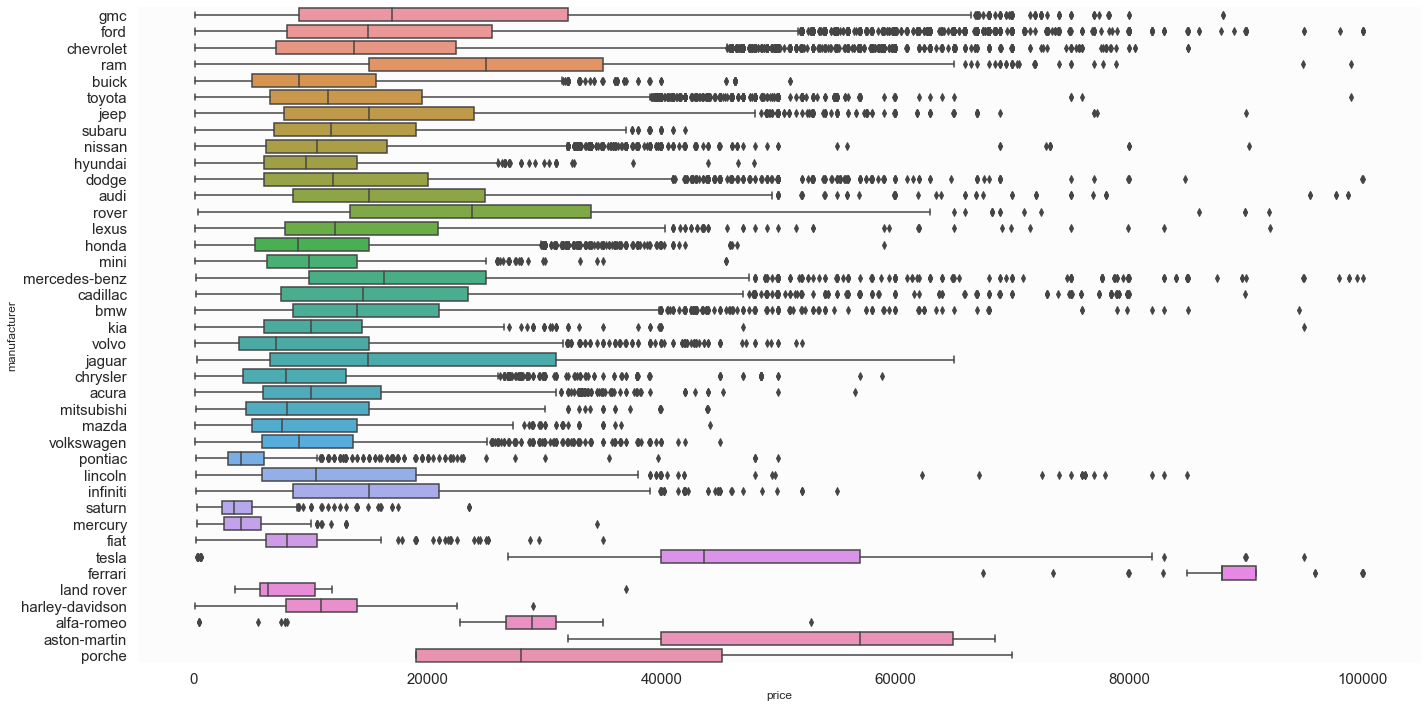

In [12]:
sns.catplot(y="manufacturer", x="price", kind="box", height=10, aspect=2, data=df)

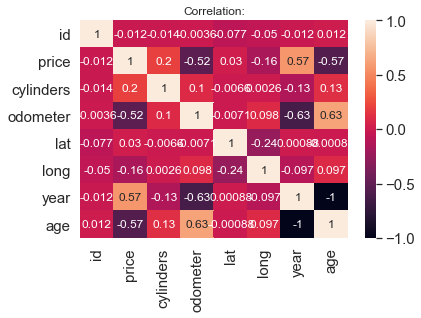

In [13]:
sns.heatmap(df.corr(), annot = True)
plt.title("Correlation:")
plt.show()

In order to have a fully preprocessed dataset, we can get rid of those values which do not impact or correlate with price. We can get rid of lat/long, year, model, and ID. We can then use One-Hot encoding to convert our categorical variables to numerical for testing the models. The `condition` column can be given weighted numerical values that correlate with the specific state of the vehicle. This will make our dataset ready for modeling.

In [14]:
df = df.drop(columns=['id', 'lat', 'long', 'year', 'model'])
df.head()

region  price manufacturer condition  cylinders    fuel  \
0  duluth / superior  16995          gmc      good        8.0  diesel   
1  duluth / superior  13995         ford      good        6.0     gas   
2  duluth / superior   7995    chevrolet      good        4.0     gas   
3  duluth / superior   8995    chevrolet      good        6.0     gas   
4  duluth / superior  10995         ford      good        6.0     gas   

   odometer title_status transmission drive   type paint_color state  age  
0  254217.0        clean    automatic   4wd  truck       white    mn   13  
1  188406.0        clean    automatic   4wd  truck        grey    mn    8  
2  108124.0        clean    automatic   4wd    SUV        grey    mn   10  
3  178054.0        clean    automatic   4wd    SUV       white    mn    9  
4  170259.0        clean    automatic   4wd    SUV       white    mn    6

In [15]:
#One-Hot encode categorical variables
cate_Columns = ['region', 'manufacturer', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']
for column in cate_Columns:
    column = pd.get_dummies(df[column],drop_first=True)
    df = pd.concat([df,column],axis=1)
df = df.drop(columns = cate_Columns)
df.head()

price condition  cylinders  odometer  age  akron / canton  albany  \
0  16995      good        8.0  254217.0   13               0       0   
1  13995      good        6.0  188406.0    8               0       0   
2   7995      good        4.0  108124.0   10               0       0   
3   8995      good        6.0  178054.0    9               0       0   
4  10995      good        6.0  170259.0    6               0       0   

   albuquerque  altoona-johnstown  amarillo  ...  sd  tn  tx  ut  va  vt  wa  \
0            0                  0         0  ...   0   0   0   0   0   0   0   
1            0                  0         0  ...   0   0   0   0   0   0   0   
2            0                  0         0  ...   0   0   0   0   0   0   0   
3            0                  0         0  ...   0   0   0   0   0   0   0   
4            0                  0         0  ...   0   0   0   0   0   0   0   

   wi  wv  wy  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   0   0   0  
4   0   0   0  

[5 rows x 522 columns]

In [16]:
#assign weighted numerical values to 'conditions'
conditions = {
    'like new' : 0,
    'excellent': 1,
    'good': 2,
    'fair': 3,
    }
df['cat_condition'] = df.condition.apply(lambda v:conditions[v])

In [17]:
df = df.drop(columns=['condition'])

In [18]:
#scale down the odometer to match the other values
from sklearn import preprocessing
df["odometer"] = np.sqrt(preprocessing.minmax_scale(df["odometer"]))
df.head()

price  cylinders  odometer  age  akron / canton  albany  albuquerque  \
0  16995        8.0  0.657356   13               0       0            0   
1  13995        6.0  0.565869    8               0       0            0   
2   7995        4.0  0.428592   10               0       0            0   
3   8995        6.0  0.550095    9               0       0            0   
4  10995        6.0  0.537912    6               0       0            0   

   altoona-johnstown  amarillo  ames  ...  tn  tx  ut  va  vt  wa  wi  wv  wy  \
0                  0         0     0  ...   0   0   0   0   0   0   0   0   0   
1                  0         0     0  ...   0   0   0   0   0   0   0   0   0   
2                  0         0     0  ...   0   0   0   0   0   0   0   0   0   
3                  0         0     0  ...   0   0   0   0   0   0   0   0   0   
4                  0         0     0  ...   0   0   0   0   0   0   0   0   0   

   cat_condition  
0              2  
1              2  
2              2  
3              2  
4              2  

[5 rows x 522 columns]

The dataset is now ready for ML modeling.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1), 
                                                    df['price'], test_size=0.25, 
                                                    random_state=141)

Since Regression will be the basis of our modeling, we use R2 score and root mean squared error (RMSE) as the way to evaluate our models.

In [20]:
model_score = pd.DataFrame(columns=('r2', 'rmse'))

First, we shall try Linear Regression as it is the simplest model to measure and evaluate.

In [21]:
lrmodel = LinearRegression()
lrmodel.fit(X_train,y_train)

LinearRegression()

For Linear regressor, test RMSE is: 7141.0986039960935
Test R2 score is: 0.6680878847692018


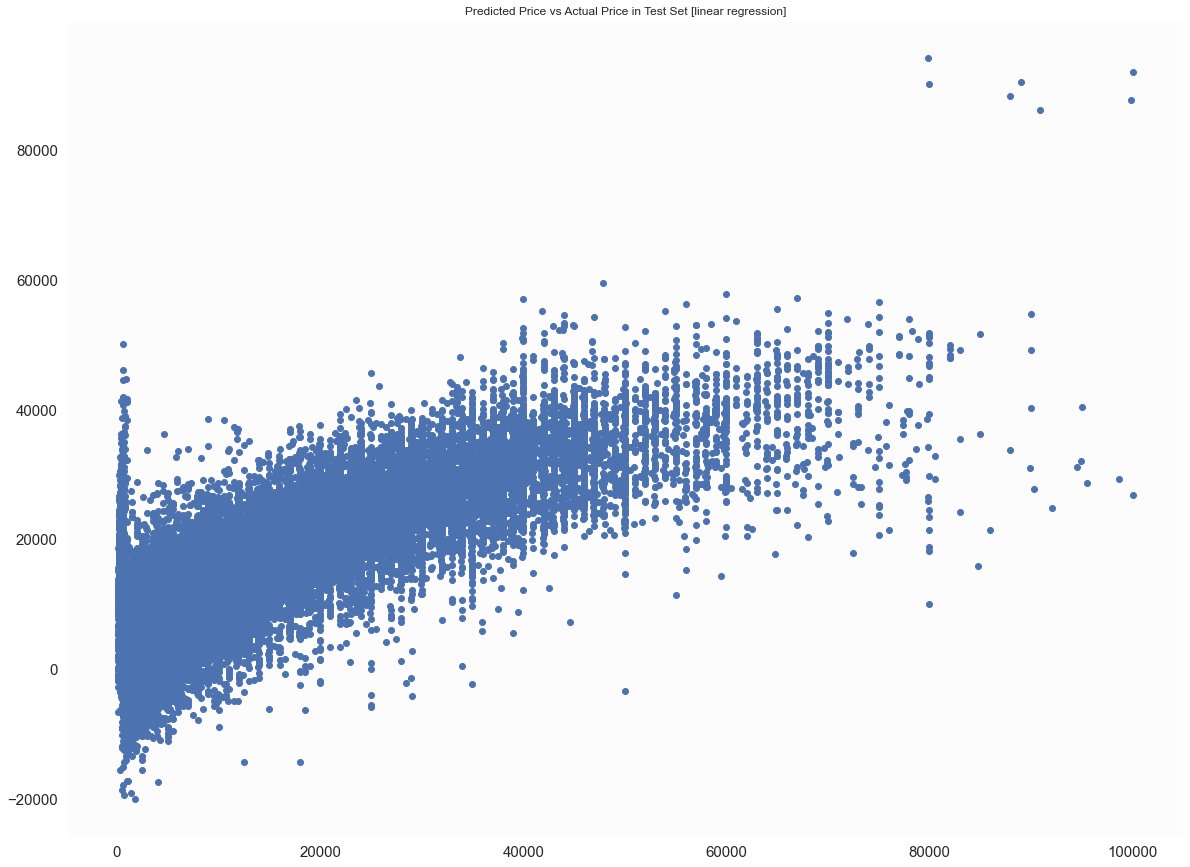

In [22]:
lr_predict = lrmodel.predict(X_test)

lr_r2 = metrics.r2_score(y_test, lr_predict)
lr_rmse = math.sqrt(metrics.mean_squared_error(y_test, lr_predict))

model_score = model_score.append(pd.DataFrame({'r2':[lr_r2], 'rmse':[lr_rmse]}, index = ['Linear Regression']))

print('For Linear regressor, test RMSE is:', lr_rmse)
print('Test R2 score is:', lr_r2)

fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Predicted Price vs Actual Price in Test Set [linear regression]')
plt.scatter(y_test, lr_predict)

It seems that the linear regression model does not perform as ideally as we would hope (R2 is 0.67). To test whether it is overfitting or not, we can calculate R2 for the training set.

For Linear regressor, training RMSE is: 7121.5080120085295
The r2 score for the training set is: 0.6679729163089045


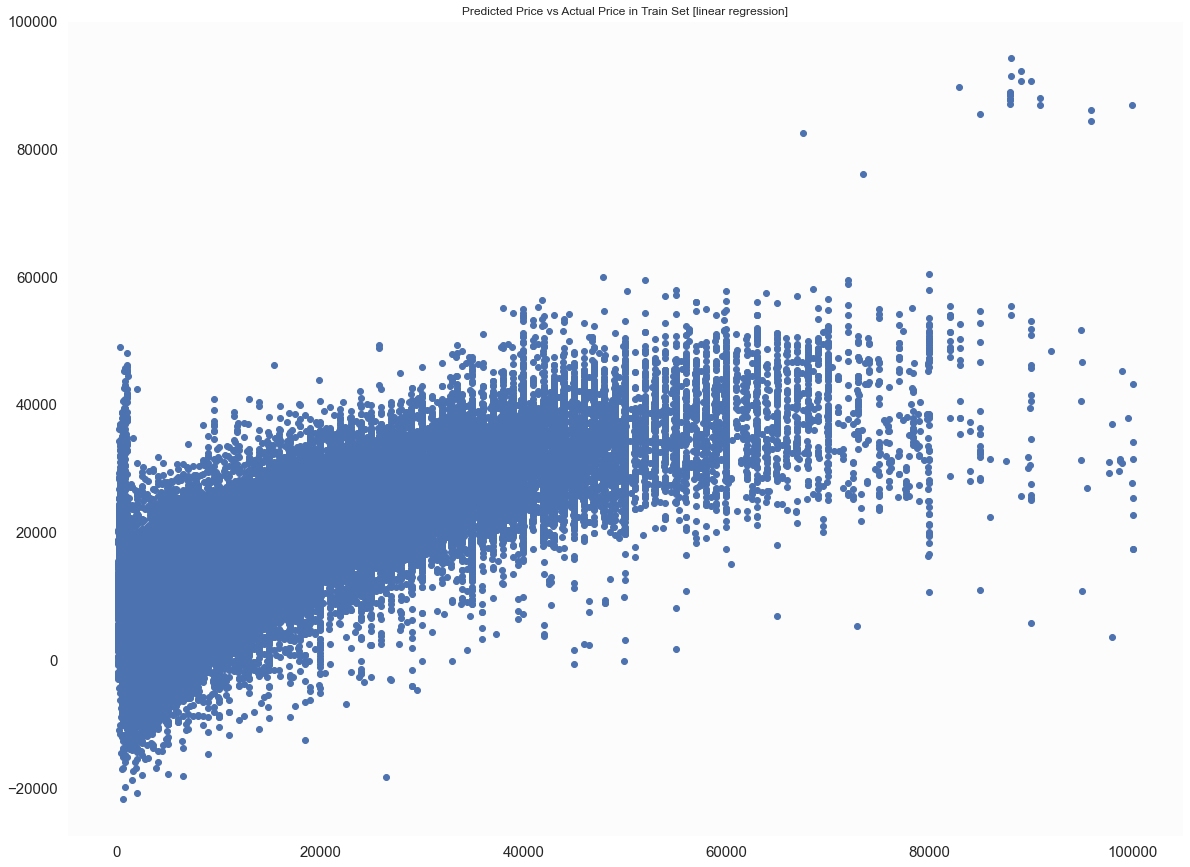

In [23]:
lr_predict_train = lrmodel.predict(X_train)

lr_r2_train = metrics.r2_score(y_train, lr_predict_train)
lr_rmse_train = math.sqrt(metrics.mean_squared_error(y_train, lr_predict_train))

print('For Linear regressor, training RMSE is:', lr_rmse_train)
print('The r2 score for the training set is:', lr_r2_train)

fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Predicted Price vs Actual Price in Train Set [linear regression]')
plt.scatter(y_train, lr_predict_train)

Since both the train and test sets have similar RMSE and R2 score, it seems that overfitting is not the probelm. The Linear Regression overall just does not fit well.

Next we will try LASSO (least absolute shrinkage and selection operator) Regression, which is a linear regression model featuring an L1 regularization factor to eliminate the errors caused by collinearity and overfitting. We will choose 12 regularization coefficents and choose the best via cross validation method.

In [24]:
alphas = np.logspace(-4,4,12)
lasso = LassoCV(max_iter=10**6, alphas=alphas)
lasso.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-04, 5.33669923e-04, 2.84803587e-03, 1.51991108e-02,
       8.11130831e-02, 4.32876128e-01, 2.31012970e+00, 1.23284674e+01,
       6.57933225e+01, 3.51119173e+02, 1.87381742e+03, 1.00000000e+04]),
        max_iter=1000000)

For the Lasso linear regressor, the root mean square error for the testing set is: 7140.11132386533
The r2 score for the testing set is: 0.6681796542860721


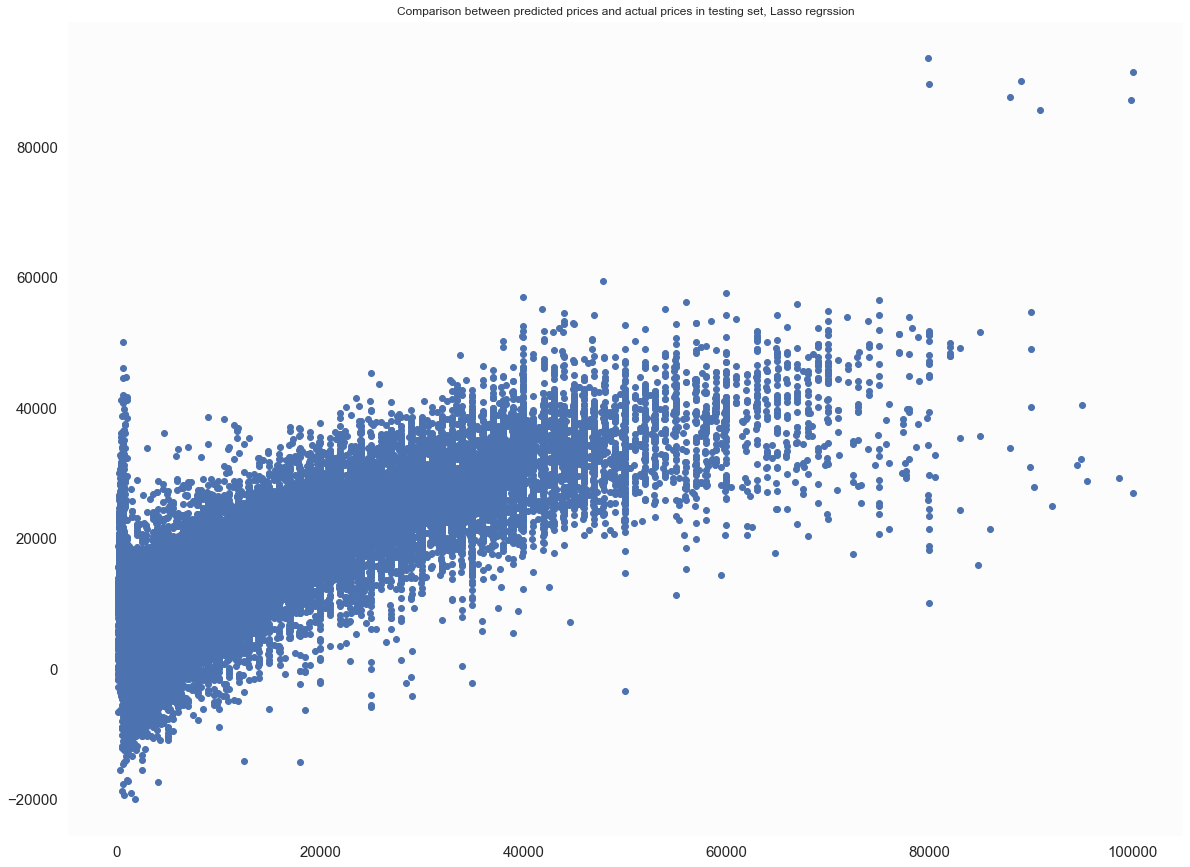

In [27]:
lasso_predict = lasso.predict(X_test)

lasso_r2 = metrics.r2_score(y_test, lasso_predict)
lasso_rmse = math.sqrt(metrics.mean_squared_error(y_test, lasso_predict))

model_score = model_score.append(pd.DataFrame({'r2':[lasso_r2], 'rmse':[lasso_rmse]}, index = ['Lasso Regression']))

print('For the Lasso linear regressor, the root mean square error for the testing set is:', lasso_rmse)
print('The r2 score for the testing set is:', lasso_r2)

fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Comparison between predicted prices and actual prices in testing set, Lasso regrssion')
plt.scatter(y_test, lasso_predict)

In [29]:
df.head()

price  cylinders  odometer  age  akron / canton  albany  albuquerque  \
0  16995        8.0  0.657356   13               0       0            0   
1  13995        6.0  0.565869    8               0       0            0   
2   7995        4.0  0.428592   10               0       0            0   
3   8995        6.0  0.550095    9               0       0            0   
4  10995        6.0  0.537912    6               0       0            0   

   altoona-johnstown  amarillo  ames  ...  tn  tx  ut  va  vt  wa  wi  wv  wy  \
0                  0         0     0  ...   0   0   0   0   0   0   0   0   0   
1                  0         0     0  ...   0   0   0   0   0   0   0   0   0   
2                  0         0     0  ...   0   0   0   0   0   0   0   0   0   
3                  0         0     0  ...   0   0   0   0   0   0   0   0   0   
4                  0         0     0  ...   0   0   0   0   0   0   0   0   0   

   cat_condition  
0              2  
1              2  
2              2  
3              2  
4              2  

[5 rows x 522 columns]

Now we will test Random Forest Regression as it handles high dimensionality well.

In [30]:
ranForest_model = RandomForestRegressor(max_depth=8, random_state=0)
ranF_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, random_state=0)

Random Forest Test RMSE: 6903.850590088646
R2 Test: 0.6897756999366923


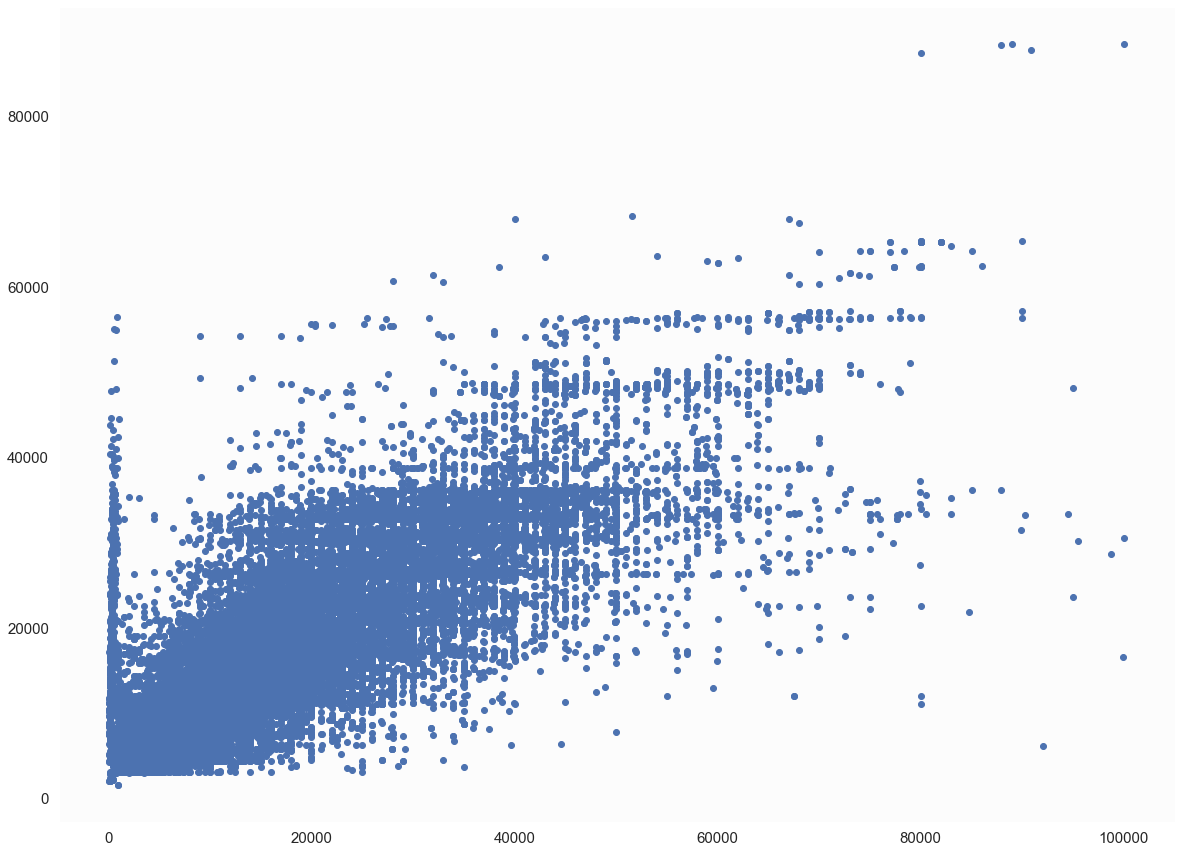

In [31]:
ranF_predict = ranF_model.predict(X_test)

ranF_r2 = metrics.r2_score(y_test, ranF_predict)
ranF_rmse = math.sqrt(metrics.mean_squared_error(y_test, ranF_predict))

model_score = model_score.append(pd.DataFrame({'r2':[ranF_r2], 'rmse':[ranF_rmse]}, index = ['Random Forest']))

print('Random Forest Test RMSE:', ranF_rmse)
print('R2 Test:', ranF_r2)
fig, ax = plt.subplots(figsize=(20,15))
plt.scatter(y_test, ranF_predict)

The Random Forest did not perform as well as expected with an R2 of only 0.68, so next we can try K Nearest Neighbors for a better fit.

In [34]:
knnReg = KNeighborsRegressor()

param_grid = [
     {
         'weights':['uniform'],
         'n_neighbors':[i for i in range(1,7)]
     }]

grid_search_knn = GridSearchCV(knnReg, param_grid,n_jobs=-1,verbose=2)
grid_search_knn.fit(X_train, y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 156.8min finished


GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6],
                          'weights': ['uniform']}],
             verbose=2)

In [35]:
knn_best = grid_search_knn.best_estimator_
knn_best

KNeighborsRegressor(n_neighbors=6)

For the K-NN regressor, the Test RMSE is: 5987.729538324954
The r2 score for the testing set is: 0.7666448467375839


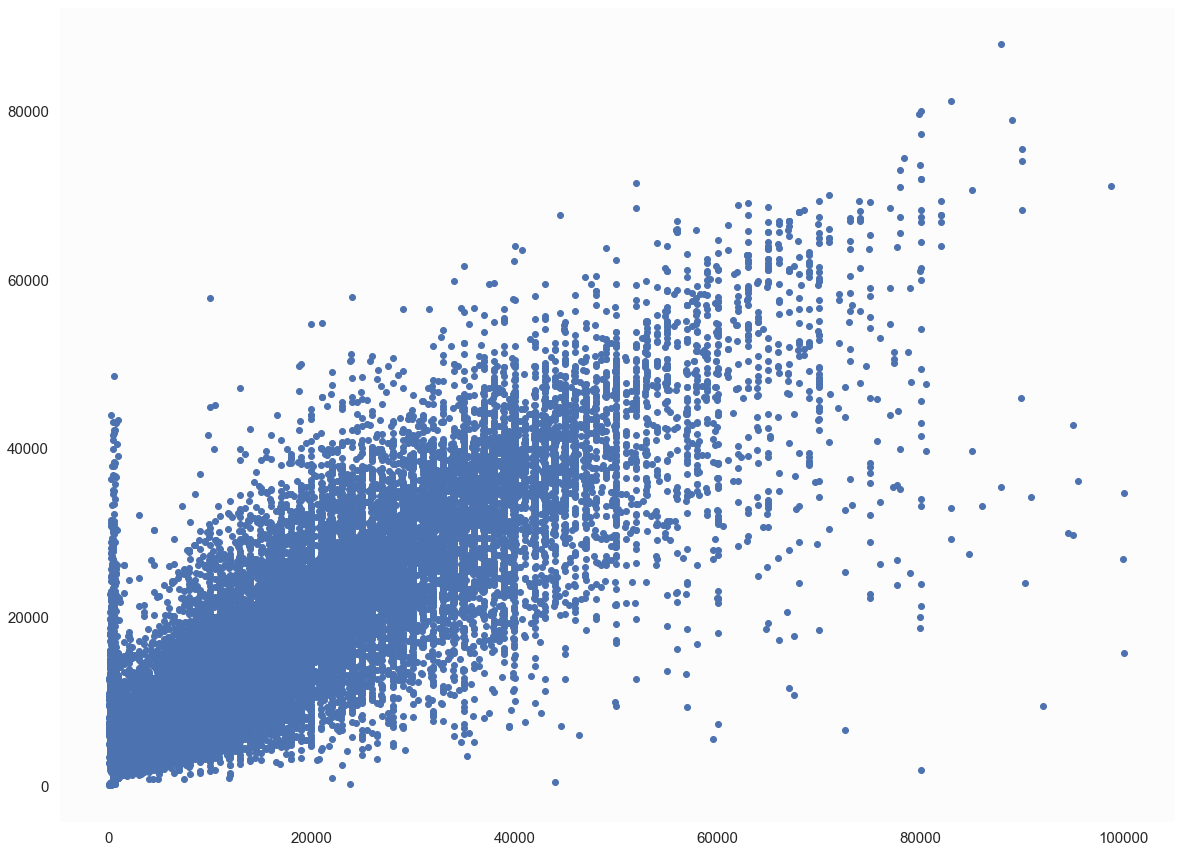

In [36]:
knn_predict = knn_best.predict(X_test)

knn_r2 = metrics.r2_score(y_test, knn_predict)
knn_rmse = math.sqrt(metrics.mean_squared_error(y_test, knn_predict))

model_score = model_score.append(pd.DataFrame({'r2':[knn_r2], 'rmse':[knn_rmse]}, index = ['K - Nearest Neighbor']))

print('For the K-NN regressor, the Test RMSE is:', knn_rmse)
print('The r2 score for the testing set is:', knn_r2)
fig, ax = plt.subplots(figsize=(20,15))
plt.scatter(y_test, knn_predict)